In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, LSTM

In [68]:
data = pd.read_csv("/Users/mangodingo/Desktop/VS/Advanced AI/dataset/iris.data", header=None)
df = pd.DataFrame(data)

In [69]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
df.columns =['sepal length', 
            'sepal width',
            'petal length',
            'petal width',
            'class']

In [71]:
#라벨링

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()


for i in df.columns:
    df[i]=label.fit_transform(df[i])


df

,sepal length,sepal width,petal length,petal width,class
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [72]:
df['class'].unique()

array([0, 1, 2])

In [73]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

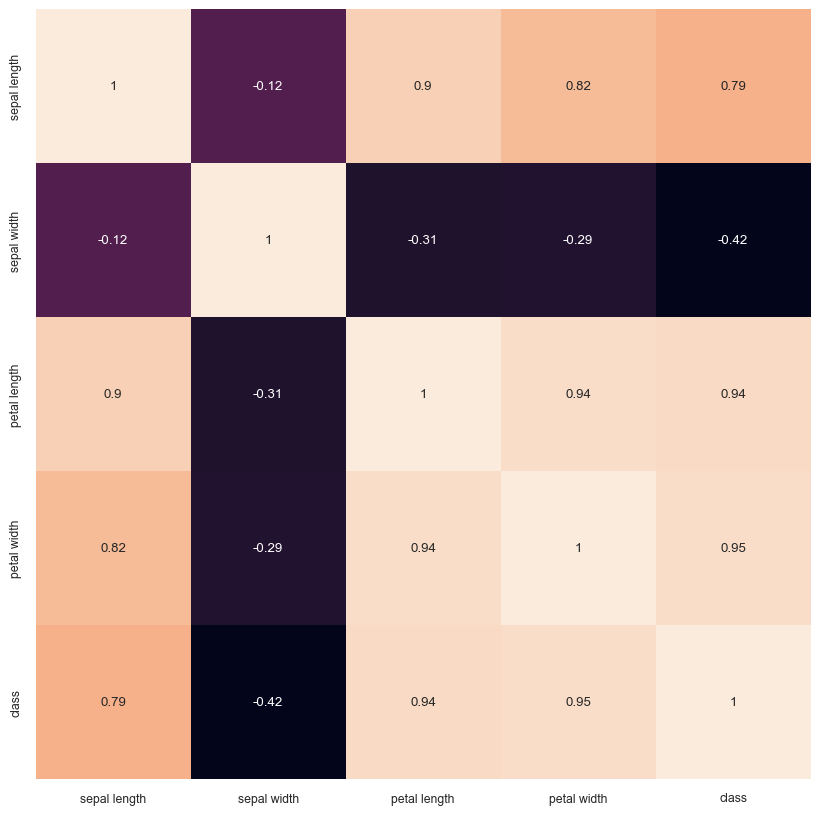

In [74]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [75]:
#Splitting the data into training and test test
x = df.drop(['class'], axis=1)
y = df['class']

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y = encoder.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [76]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

# 표준화된 데이터를 데이터프레임으로 변환
df_standardized = pd.DataFrame(x_standardized, columns=x.columns)
df_standardized['Class'] = y


In [77]:
# 정규화 진행
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x_standardized)

# 정규화된 데이터를 데이터프레임으로 변환
df_normalized = pd.DataFrame(x_normalized, columns=x.columns)
df_normalized['Class'] = y


In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [79]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(4,1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))  # 은닉층 1
cnn_model.add(Dense(64, activation='relu'))   # 은닉층 2
cnn_model.add(Dense(3,activation='sigmoid'))   # 클래스 수에 맞게 출력층 설정
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [80]:
from keras.callbacks import ModelCheckpoint
from tensorflow import keras

checkpoint = ModelCheckpoint("best_cnn.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

# CNN 모델 학습
cnn_his = cnn_model.fit(x_train, y_train, epochs=50, batch_size=4, validation_data=(x_test, y_test), callbacks=checkpoint)

best_cnn = keras.models.load_model("best_cnn.h5")

Epoch 1/50
 1/30 [>.............................] - ETA: 20s - loss: 1.0978 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.56667, saving model to best_cnn.h5
30/30 [==============================] - 1s 8ms/step - loss: 0.8564 - accuracy: 0.5917 - val_loss: 0.7924 - val_accuracy: 0.5667
Epoch 2/50
 1/30 [>.............................] - ETA: 0s - loss: 0.2322 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.56667 to 0.76667, saving model to best_cnn.h5
30/30 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7750 - val_loss: 0.4305 - val_accuracy: 0.7667
Epoch 3/50
 1/30 [>.............................] - ETA: 0s - loss: 0.7760 - accuracy: 0.5000

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy did not improve from 0.76667
30/30 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.7417 - val_loss: 0.4865 - val_accuracy: 0.7000
Epoch 4/50
29/30 [============================>.] - ETA: 0s - loss: 0.3773 - accuracy: 0.8017
Epoch 4: val_accuracy improved from 0.76667 to 0.80000, saving model to best_cnn.h5
30/30 [==============================] - 0s 4ms/step - loss: 0.3705 - accuracy: 0.8083 - val_loss: 0.2940 - val_accuracy: 0.8000
Epoch 5/50
 1/30 [>.............................] - ETA: 0s - loss: 0.5854 - accuracy: 0.7500
Epoch 5: val_accuracy did not improve from 0.80000
30/30 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.7917 - val_loss: 0.4065 - val_accuracy: 0.8000
Epoch 6/50
 1/30 [>.............................] - ETA: 0s - loss: 0.4698 - accuracy: 0.5000
Epoch 6: val_accuracy did not improve from 0.80000
30/30 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8083 - val_

In [81]:
# RNN 모델 생성
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, activation='relu', input_shape=(4, 1)))  # 은닉층 1
rnn_model.add(Dense(64, activation='relu'))  # 은닉층 2
rnn_model.add(Dense(3, activation='softmax'))  # 클래스 수에 맞게 출력층 설정
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [82]:
# RNN 모델 학습

checkpoint = ModelCheckpoint("best_rnn.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

rnn_his = rnn_model.fit(x_train, y_train, epochs=50, batch_size=4, validation_data=(x_test, y_test), callbacks=checkpoint)

best_rnn = keras.models.load_model("best_rnn.h5")

Epoch 1/50
28/30 [===========================>..] - ETA: 0s - loss: 0.6967 - accuracy: 0.6696 
Epoch 1: val_accuracy improved from -inf to 0.56667, saving model to best_rnn.h5
30/30 [==============================] - 2s 11ms/step - loss: 0.6970 - accuracy: 0.6750 - val_loss: 0.9266 - val_accuracy: 0.5667
Epoch 2/50
28/30 [===========================>..] - ETA: 0s - loss: 0.4392 - accuracy: 0.7589
Epoch 2: val_accuracy improved from 0.56667 to 0.86667, saving model to best_rnn.h5
30/30 [==============================] - 0s 4ms/step - loss: 0.4325 - accuracy: 0.7667 - val_loss: 0.2633 - val_accuracy: 0.8667
Epoch 3/50
29/30 [============================>.] - ETA: 0s - loss: 0.4419 - accuracy: 0.7586

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy improved from 0.86667 to 0.93333, saving model to best_rnn.h5
30/30 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.7583 - val_loss: 0.2895 - val_accuracy: 0.9333
Epoch 4/50
29/30 [============================>.] - ETA: 0s - loss: 0.3915 - accuracy: 0.7500
Epoch 4: val_accuracy did not improve from 0.93333
30/30 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.7417 - val_loss: 0.2526 - val_accuracy: 0.9000
Epoch 5/50
29/30 [============================>.] - ETA: 0s - loss: 0.3358 - accuracy: 0.8534
Epoch 5: val_accuracy did not improve from 0.93333
30/30 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8417 - val_loss: 0.3562 - val_accuracy: 0.8000
Epoch 6/50
29/30 [============================>.] - ETA: 0s - loss: 0.3291 - accuracy: 0.8190
Epoch 6: val_accuracy did not improve from 0.93333
30/30 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8250 - val_

In [83]:
# LSTM 모델 생성
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', input_shape=(4, 1)))  # 은닉층 1
lstm_model.add(Dense(64, activation='relu'))  # 은닉층 2
lstm_model.add(Dense(3, activation='softmax'))  # 클래스 수에 맞게 출력층 설정
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
# LSTM 모델 학습

checkpoint = ModelCheckpoint("best_lstm.h5", monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

lstm_his = lstm_model.fit(x_train, y_train, epochs=50, batch_size=4, validation_data=(x_test, y_test), callbacks=checkpoint)

best_lstm = keras.models.load_model("best_lstm.h5")

Epoch 1/50
18/30 [=================>............] - ETA: 0s - loss: 0.8328 - accuracy: 0.5278 
Epoch 1: val_accuracy improved from -inf to 0.86667, saving model to best_lstm.h5
30/30 [==============================] - 2s 14ms/step - loss: 0.7627 - accuracy: 0.6583 - val_loss: 0.6014 - val_accuracy: 0.8667
Epoch 2/50
15/30 [==============>...............] - ETA: 0s - loss: 0.4545 - accuracy: 0.8667
Epoch 2: val_accuracy did not improve from 0.86667
30/30 [==============================] - 0s 5ms/step - loss: 0.3629 - accuracy: 0.9000 - val_loss: 0.7183 - val_accuracy: 0.6667
Epoch 3/50
 1/30 [>.............................] - ETA: 0s - loss: 0.0310 - accuracy: 1.0000

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/30 [================>.............] - ETA: 0s - loss: 0.4274 - accuracy: 0.8235
Epoch 3: val_accuracy improved from 0.86667 to 0.96667, saving model to best_lstm.h5
30/30 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8750 - val_loss: 0.1707 - val_accuracy: 0.9667
Epoch 4/50
18/30 [=================>............] - ETA: 0s - loss: 0.1619 - accuracy: 0.9444
Epoch 4: val_accuracy did not improve from 0.96667
30/30 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9250 - val_loss: 0.1313 - val_accuracy: 0.9333
Epoch 5/50
20/30 [===================>..........] - ETA: 0s - loss: 0.2603 - accuracy: 0.9125
Epoch 5: val_accuracy improved from 0.96667 to 1.00000, saving model to best_lstm.h5
30/30 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.9250 - val_loss: 0.1344 - val_accuracy: 1.0000
Epoch 6/50
28/30 [===========================>..] - ETA: 0s - loss: 0.1637 - accuracy: 0.9464
Epoch 6: val_accuracy did n

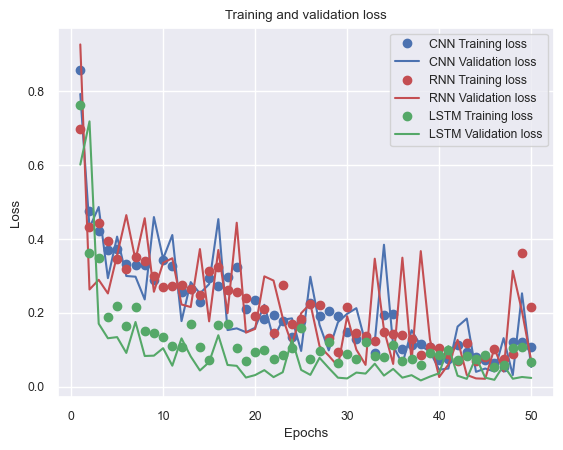

In [85]:
cnn_history = cnn_his.history
cnn_history.keys()

rnn_history = rnn_his.history
rnn_history.keys()

lstm_history = lstm_his.history
lstm_history.keys()

import matplotlib.pyplot as plt

Closs_values = cnn_history["loss"]
Cval_loss_values = cnn_history["val_loss"]

Rloss_values = rnn_history["loss"]
Rval_loss_values = rnn_history["val_loss"]

Lloss_values = lstm_history["loss"]
Lval_loss_values = lstm_history["val_loss"]

epochs = range(1, 51)
plt.plot(epochs, Closs_values, "bo", label="CNN Training loss")
plt.plot(epochs, Cval_loss_values, "b", label="CNN Validation loss")

plt.plot(epochs, Rloss_values, "ro", label="RNN Training loss")
plt.plot(epochs, Rval_loss_values, "r", label="RNN Validation loss")

plt.plot(epochs, Lloss_values, "go", label="LSTM Training loss")
plt.plot(epochs, Lval_loss_values, "g", label="LSTM Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, x_test, y_test):
    # 테스트 데이터에서 예측 수행
    y_pred = model.predict(x_test)

    # 예측된 확률을 클래스 레이블로 변환
    y_pred_labels = np.argmax(y_pred, axis=1)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred_labels)

    # F1 스코어 계산
    f1 = f1_score(y_test, y_pred_labels, average='weighted')
   
    print(f"정확도: {accuracy * 100:.2f}%")
    print(f"F1 스코어: {f1 * 100:.2f}%")


# 모델을 사용하여 평가
print('CNN')
evaluate_model(best_cnn, x_test, y_test)

print('RNN')
evaluate_model(best_rnn, x_test, y_test)

print('LSTM')
evaluate_model(best_lstm, x_test, y_test)


CNN
1/1 [==============================] - 0s 92ms/step
정확도: 100.00%
F1 스코어: 100.00%
RNN
1/1 [==============================] - 0s 186ms/step
정확도: 100.00%
F1 스코어: 100.00%
LSTM
1/1 [==============================] - 0s 180ms/step
정확도: 100.00%
F1 스코어: 100.00%
